# Theo dõi đối tượng
**Satya Mallick, LearnOpenCV.com**

- Theo dõi là gì?
- Theo dõi trong tầm nhìn máy tính.
- Mô hình chuyển động và mô hình xuất hiện.
- Lớp theo dõi API OpenCV.

# Goal

 Given the initial location of an object, track location in subsequent frames

![Object Tracking](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_NB11_race_car_tracking.png)

In [1]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

# Lớp theo dõi trong OpenCV

1. BOOSTING
2. MIL
3. KCF
4. CRST
5. TLD
* Có xu hướng phục hồi sau khi bị che khuất
6. MEDIANFLOW
* Tốt cho chuyển động chậm có thể dự đoán được
7. GOTURN
* Dựa trên Học sâu
* Chính xác nhất
8. MOSSE
* Nhanh nhất

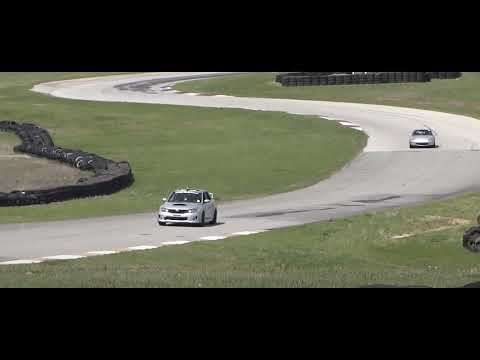

In [2]:
video = YouTubeVideo("XkJCvtCRdVM", width=1024, height=640)
display(video)

In [3]:
video_input_file_name = "videos/race_car.mp4"

def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)

def displayRectangle(frame, bbox):
    plt.figure(figsize=(20, 10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy)
    #plt.axis("off")

def drawText(frame, txt, location, color=(50, 170, 50)):
    cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

# GOTURN Tracker

![](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_NB11_goturn.jpg)

# Tạo phiên bản Tracker

In [4]:
# Thiết lập tracker
tracker_types = [
    "BOOSTING",
    "MIL",
    "KCF",
    "CSRT",
    "TLD",
    "MEDIANFLOW",
    "GOTURN",
    "MOSSE",
]
# Thay đổi chỉ mục để thay đổi loại trình theo dõi
tracker_type = tracker_types[3]

if tracker_type == "BOOSTING":
    tracker = cv2.legacy.TrackerBoosting.create()
elif tracker_type == "MIL":
    tracker = cv2.legacy.TrackerMIL.create()
elif tracker_type == "KCF":
    tracker = cv2.legacy.TrackerKCF.create()
elif tracker_type == "CSRT":
    tracker = cv2.legacy.TrackerCSRT.create()
elif tracker_type == "TLD":
    tracker = cv2.legacy.TrackerTLD.create()
elif tracker_type == "MEDIANFLOW":
    tracker = cv2.legacy.TrackerMedianFlow.create()
elif tracker_type == "GOTURN":
    tracker = cv2.legacy.TrackerGOTURN.create()
else:
    tracker = cv2.legacy.TrackerMOSSE.create()

# Đọc video đầu vào & Thiết lập video đầu ra

In [5]:
# Đọc video
video = cv2.VideoCapture(video_input_file_name)
ok, frame = video.read()

# Thoát nếu không đọc được
if not video.isOpened():
    print("Could not open video")
    sys.exit()
else:
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

video_output_file_name = "videos/race_car-" + tracker_type + ".mp4"
video_out = cv2.VideoWriter(video_output_file_name, cv2.VideoWriter_fourcc(*"XVID"), 10, (width, height))

video_output_file_name

'videos/race_car-CSRT.mp4'

# Định nghĩa hộp giới hạn

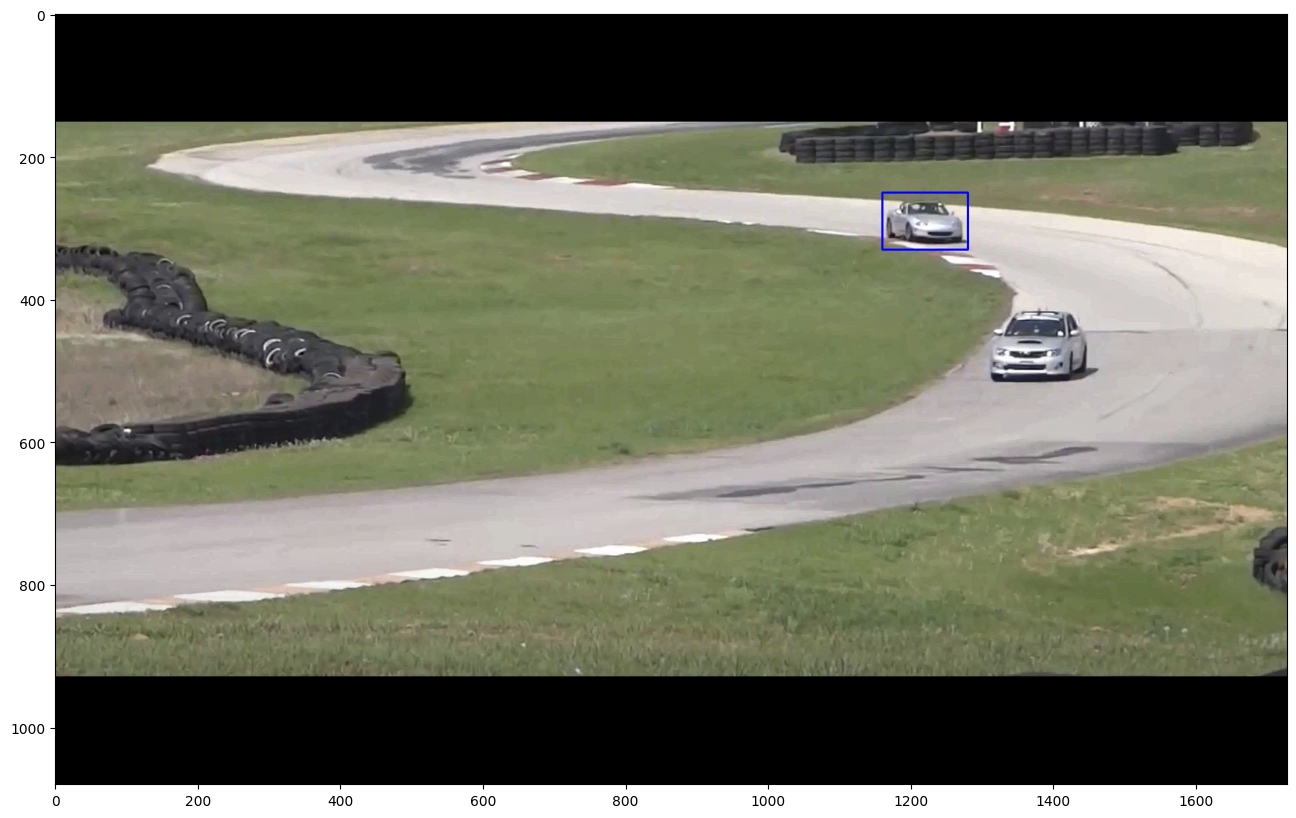

In [6]:
# Định nghĩa hộp giới hạn
bbox = (1160, 250, 120, 80)
# bbox = cv2.selectROI(frame, False)
# print(bbox)
displayRectangle(frame, bbox)

# Intilialize Tracker

1. Một khung hình

2. Một hộp giới hạn

In [7]:
# Khởi tạo trình theo dõi với khung hình đầu tiên và hộp giới hạn

ok = tracker.init(frame, bbox)

# Đọc khung và theo dõi đối tượng

In [8]:
while True:
    ok, frame = video.read()

    if not ok:
        break

    # Bắt đầu hẹn giờ
    timer = cv2.getTickCount()

    # Cập nhật tracker
    ok, bbox = tracker.update(frame)

    # Tính số khung hình trên giây (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)

    # Vẽ hộp giới hạn
    if ok:
        drawRectangle(frame, bbox)
    else:
        drawText(frame, "Tracking failure detected", (80, 140), (0, 0, 255))

    # Display Info
    drawText(frame, tracker_type + " Tracker", (80, 60))
    drawText(frame, "FPS : " + str(int(fps)), (80, 100))

    # Write frame to video
    video_out.write(frame)

video.release()
video_out.release()

In [9]:
!ffmpeg -y -i {video_output_file_name} -c:v libx264 "videos/race_car_track_x264.mp4"  -hide_banner -loglevel error

#### Kết xuất video MP4

In [10]:
mp4 = open("videos/race_car_track_x264.mp4", "rb").read()
data_url = "data:videos/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=1024 controls><source src="{data_url}" type="videos/mp4"></video>""")

Video dự kiến ​​được hiển thị trong ô trên phải giống như video sau.

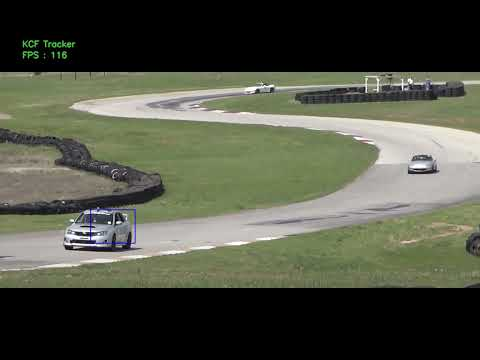

In [11]:
# Tracker: KCF
video = YouTubeVideo("pk3tmdRX4ww", width=1024, height=640)
display(video)

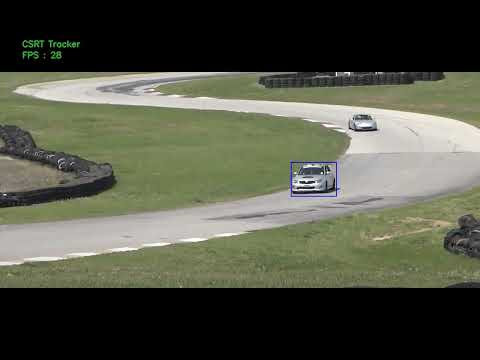

In [12]:
# Tracker: CSRT
video = YouTubeVideo("6gGDf-7ypBE", width=1024, height=640)
display(video)

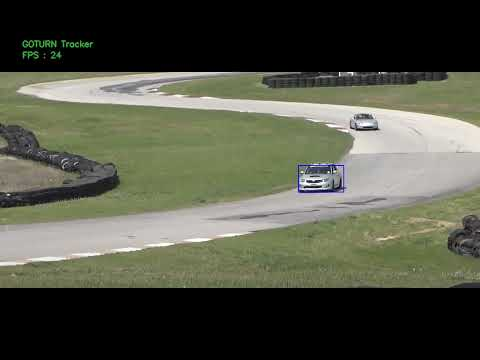

In [13]:
# Tracker: GOTURN
video = YouTubeVideo("0bnWxc4zMvY", width=1024, height=640)
display(video)